# Project Title: Economic and Market Cycle Prediction through Macroeconomic Analysis

# GitHub Link: https://github.com/cs418-fa24/project-check-in-team-6/

# Project Introduction

The goal of this project is to analyze and model the relationships between macroeconomic indicators and market cycles. We are using historical economic data, including interest rates, inflation rates, and unemployment data, to predict periods of market expansion and recession. These periods of market regimes are often influenced by various economic variables, and the objective is to identify the most significant indicators for predicting market cycles.

## Research Questions:
- **Which economic indicators are most predictive of market recessions and expansions?**
- **Can machine learning models, such as Random Forest and XGBoost, accurately predict market regimes based on economic data?**



In [79]:
import sys
import pandas as pd
import plotly.express as px

In [80]:
import sys
sys.path.append('/Users/satyakapardibudi/Desktop/Data Science Proj')

import pandas as pd

from data_understanding import get_nber_cycles, get_fred_cycles, get_sp500_monthly
from data_understanding import get_fredmd_feat_desc, get_fredmd_ds

import plotly.express as px
from data_understanding import plot_regimes

**To effectively explore the features of the FRED-MD dataset and better understand the outputs of our prediction models, it is essential to access the detailed feature descriptions. These descriptions are available in the appendix files**

In [81]:
# Get FRED-MD features specification
fredmd_features_desc = get_fredmd_feat_desc(file_name = 'FRED-MD_historic_appendix.csv')

# Save data into a CSV file
fredmd_features_desc.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/fredmd_feat_spec.csv')

# Show data
fredmd_features_desc

,Feature,Description,Group,TCode
ID,,,,
1,RPI,Real Personal Income,Output and Income,5
2,W875RX1,Real personal income ex transfer receipts,Output and Income,5
3,DPCERA3M086SBEA,Real personal consumption expenditures,"Consumption, Orders and Inventories",5
4,CMRMTSPLx,Real Manu. and Trade Industries Sales,"Consumption, Orders and Inventories",5
5,RETAILx,Retail and Food Services Sales,"Consumption, Orders and Inventories",5
...,...,...,...,...
131,MZMSL,MZM Money Stock,Money and Credit,6
132,DTCOLNVHFNM,Consumer Motor Vehicle Loans Outstanding,Money and Credit,6
133,DTCTHFNM,Total Consumer Loans and Leases Outstanding,Money and Credit,6


In [82]:
from data_understanding import get_fredmd_ds
# Get FRED-MD latest dataset
fredmd_ds = get_fredmd_ds()

# Save data into a CSV file
fredmd_ds.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/fredmd_feat_ds.csv')

# Show data
fredmd_ds

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Date,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,105.4461,...,119.951,127.326,30.93,35.47,27.65,69.1,542427.10,927303.15,5174.3603,12.8609
6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,105.4324,...,119.633,127.646,31.06,35.58,27.79,68.2,544655.88,926980.66,5237.0984,12.6826
7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,100.0630,...,119.775,127.966,31.20,35.70,27.96,66.4,547620.02,930576.62,5279.1498,14.4084


**Each business cycle is characterized by two pivotal junctures: the trough, representing the lowest point, and the peak, signifying the highest point. The normal phase spans from the trough of the preceding cycle to the peak of the current cycle, while the recession phase is measured from the peak to the trough.**

In [83]:
# Generate NBER business cycle labels at a monthly resolution
econ_regime_df = get_nber_cycles(months_ignored=15)

# Show data
econ_regime_df

,Regime
Date,
1857-06-01,1
1857-07-01,1
1857-08-01,1
1857-09-01,1
1857-10-01,1
...,...
2023-05-01,0
2023-06-01,0
2023-07-01,0


In [84]:
# Generate NBER business cycle labels at a monthly resolution
econ_regime_df = get_fred_cycles(months_ignored=0)

# Save data into a CSV file
econ_regime_df.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/nber_regimes.csv')

# Show data
econ_regime_df

,EconRegime
Date,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0
...,...
2024-06-01,0
2024-07-01,0
2024-08-01,0


In [85]:
# Generate S&P500 OHLC data at a monthly resolution
sp500_monthly_df = get_sp500_monthly()

# Save data into a CSV file
sp500_monthly_df.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/SP500_monthly.csv')

# Show data
sp500_monthly_df

,Open,High,Low,Close
Date,,,,
1927-12-01 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000
1928-01-01 00:00:00-05:00,17.760000,17.760000,17.260000,17.570000
1928-02-01 00:00:00-05:00,17.530001,17.629999,16.950001,17.260000
1928-03-01 00:00:00-05:00,17.299999,19.280001,17.299999,19.280001
1928-04-01 00:00:00-05:00,18.910000,19.750000,18.910000,19.750000
...,...,...,...,...
2024-07-01 00:00:00-04:00,5471.080078,5669.669922,5390.950195,5522.299805
2024-08-01 00:00:00-04:00,5537.839844,5651.620117,5119.259766,5648.399902
2024-09-01 00:00:00-04:00,5623.890137,5767.370117,5402.620117,5762.479980


In [86]:
import plotly.express as px

# Count the number of features in each group
feature_group_count = fredmd_features_desc['Group'].value_counts().reset_index(name='FeaturesCount')
feature_group_count.columns = ['Group', 'FeaturesCount']

# Create a pie chart
fig = px.pie(feature_group_count, values='FeaturesCount', names='Group', hole=0.5)
fig.update_layout(margin=dict(t=20, b=20, l=0, r=0), uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

In [87]:
group_name = 'Money and Credit'

# Filter out requested group features
fredmd_features_desc[fredmd_features_desc['Group']==group_name]

,Feature,Description,Group,TCode
ID,,,,
70,M1SL,M1 Money Stock,Money and Credit,6
71,M2SL,M2 Money Stock,Money and Credit,6
72,M2REAL,Real M2 Money Stock,Money and Credit,5
73,BOGMBASE,Monetary Base,Money and Credit,6
74,TOTRESNS,Total Reserves of Depository Institutions,Money and Credit,6
75,NONBORRES,Reserves Of Depository Institutions,Money and Credit,7
76,BUSLOANS,Commercial and Industrial Loans,Money and Credit,6
77,REALLN,Real Estate Loans at All Commercial Banks,Money and Credit,6
78,NONREVSL,Total Nonrevolving Credit,Money and Credit,6


In [88]:
feat_mnemo = 'BOGMBASE'
print(f'URL for {feat_mnemo} on the FRED: https://fred.stlouisfed.org/series/{feat_mnemo}')

URL for BOGMBASE on the FRED: https://fred.stlouisfed.org/series/BOGMBASE


In [89]:
# Show data
fredmd_ds

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Date,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,105.4461,...,119.951,127.326,30.93,35.47,27.65,69.1,542427.10,927303.15,5174.3603,12.8609
6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,105.4324,...,119.633,127.646,31.06,35.58,27.79,68.2,544655.88,926980.66,5237.0984,12.6826
7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,100.0630,...,119.775,127.966,31.20,35.70,27.96,66.4,547620.02,930576.62,5279.1498,14.4084


In [90]:
# Ensure both DataFrames have timezone-naive datetime indices
sp500_monthly_df.index = sp500_monthly_df.index.tz_localize(None)
econ_regime_df.index = econ_regime_df.index.tz_localize(None)

# Now concatenate the two DataFrames
plot_df = pd.concat([sp500_monthly_df[['Close']], econ_regime_df], axis=1).dropna()
plot_df.reset_index(inplace=True)

# Plot recession periods and SP500 closing price
plot_regimes(date_series = plot_df['Date'],
             data_series = plot_df['Close'], 
             regime_series = plot_df['EconRegime'],
             area_name = 'Recession',
             data_name = 'S&P500',
             x_axis_title = 'Date',
             y_axis_title = 'S&P500',
             plot_title = 'Recession Periods over S&P 500 Monthly Closing Price',
             log_scale = True,
             line_color = 'blue',
             width = 1200,
             height = 600)


Indentify features that exhibit a notable proportion of missing values. For features that manifest more than 10 instances of missing data After removing irrelevant data, we focus on handling the missing values. The gaps are filled by using information from previous time points to estimate the missing values.

In [91]:
from data_preparation import DataCleaning
from data_preparation import FeatureEngineering
from data_preparation import TrendFiltering

from data_understanding import plot_regimes

# Read the raw features dataset
raw_features_df = pd.read_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/fredmd_feat_ds.csv')

df = DataCleaning(data=raw_features_df)

# remove rows with more than 10 null features
df.remove_null_rows(max_null=10, inplace=True)

# remove features with more than 10 null rows
df.remove_null_features(max_null=10, inplace=True)

# Forward fill null observations 
df.fill_null_obs(inplace=True)

# save the cleaned dataframe
cleaned_features_df = df.data


# Change the date column name
cleaned_features_df.rename(columns={'sasdate': 'Date'}, inplace=True)

cleaned_features_df

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.000,6.000,6.00,6.00,6.00,6.00,6.00,6.0000
13,1/1/1960,2695.694,2537.6,15.789,2.869310e+05,18763.67069,24.1658,25.3094,24.0804,33.9891,...,15.421,63.672,18.410,10.466,2.22,2.57,2.13,7362.00,14063.00,75.4515
14,2/1/1960,2698.789,2539.9,15.858,2.910937e+05,18833.15808,23.9508,25.1659,23.9978,33.6020,...,15.437,63.775,18.411,10.484,2.23,2.59,2.14,7396.00,14144.00,73.3363
15,3/1/1960,2703.859,2542.2,16.083,2.830449e+05,18812.41558,23.7357,25.0798,23.9702,33.6407,...,15.446,63.589,18.445,10.490,2.24,2.69,2.14,7456.00,14239.00,71.5296
16,4/1/1960,2713.243,2551.4,16.331,2.858474e+05,19306.08721,23.5476,25.1372,23.9978,33.8730,...,15.502,63.665,18.561,10.512,2.23,2.61,2.14,7582.00,14413.00,71.4718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,...,123.224,105.624,119.951,127.326,30.93,35.47,27.65,542427.10,927303.15,5174.3603
786,6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,...,123.369,105.631,119.633,127.646,31.06,35.58,27.79,544655.88,926980.66,5237.0984
787,7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,...,123.571,105.318,119.775,127.966,31.20,35.70,27.96,547620.02,930576.62,5279.1498
788,8/1/2024,20108.056,16414.2,121.149,1.530114e+06,711291.00000,102.9329,101.0386,100.9656,102.1276,...,123.713,105.068,119.651,128.268,31.26,35.78,27.98,549670.11,933587.03,5327.5375


In [92]:
df = FeatureEngineering(data = cleaned_features_df)

# apply transformations to the cleaned dataset of features
df.transform_features()

# add new lagged features to the dataset
df.add_lagged_features(lag_values = [1,3,6,9,12])

# Save features dataset in a new dataframe and save it into a new .csv file for future uses
final_features_df = df.data
final_features_df.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/feats_ds.csv', index=False)

# Show final features dataframe
final_features_df.set_index('Date')

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DTCTHFNM 1M Lag,DTCTHFNM 3M Lag,DTCTHFNM 6M Lag,DTCTHFNM 9M Lag,DTCTHFNM 12M Lag,INVEST 1M Lag,INVEST 3M Lag,INVEST 6M Lag,INVEST 9M Lag,INVEST 12M Lag
Date,,,,,,,,,,,,,,,,,,,,,
1961-03-01,0.007984,0.004994,0.015978,0.035789,0.006938,0.004847,0.005932,0.001190,0.005908,-0.005453,...,-0.014290,0.010355,0.016761,0.027577,0.012437,0.017181,0.030858,0.013662,-0.004001,-0.053379
1961-04-01,0.006236,0.008374,0.012843,-0.005569,-0.007350,0.026413,0.020011,0.017738,0.023283,0.069999,...,-0.014799,0.000653,0.004461,0.031706,0.018840,-0.004491,0.029080,0.037561,0.018194,-0.025753
1961-05-01,0.009857,0.009413,0.006578,-0.000731,-0.002936,0.035632,0.022240,0.024722,0.034724,0.101383,...,-0.010637,-0.014290,0.001635,0.026114,0.022225,-0.007909,0.017181,0.040770,0.026257,0.002181
1961-06-01,0.017124,0.013943,0.008472,0.046347,0.022330,0.029190,0.017330,0.017433,0.022753,0.064217,...,-0.003451,-0.014799,0.010355,0.016761,0.027577,0.006990,-0.004491,0.030858,0.013662,-0.004001
1961-07-01,0.012255,0.010356,-0.000613,-0.002086,0.006635,0.025348,0.018348,0.016147,0.020271,0.050614,...,0.005630,-0.010637,0.000653,0.004461,0.031706,0.028577,-0.007909,0.029080,0.037561,0.018194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,0.005656,0.005932,0.004809,0.003707,0.000811,0.005375,0.002841,0.002423,0.004919,-0.024859,...,0.003053,0.000028,0.005452,0.009073,0.005954,0.009569,0.004130,-0.012364,-0.013768,-0.027872
2024-06-01,0.005909,0.005988,0.006230,0.010948,-0.000471,0.008454,0.007794,0.005138,0.006945,-0.005883,...,0.004752,0.000110,0.006046,0.008152,0.019540,-0.006749,0.018742,0.010477,-0.014359,-0.011302
2024-07-01,0.002969,0.001868,0.005555,0.011998,0.009246,-0.004715,-0.001990,-0.003603,-0.003441,-0.052400,...,0.002350,0.003053,0.004203,0.005949,0.019407,0.014386,0.009569,0.017335,-0.014706,-0.009812


In [93]:
econ_regimes = pd.read_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/nber_regimes.csv', parse_dates = ['Date']) 
econ_regimes.set_index('Date')

,EconRegime
Date,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0
...,...
2024-06-01,0
2024-07-01,0
2024-08-01,0


In [94]:
# Read SP500 monthly OHLC data
sp500_mn_df = pd.read_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/SP500_monthly.csv', index_col='Date')

# Apply l1-trend-filtering
df = TrendFiltering(mkt_data = sp500_mn_df)
mkt_regimes = df.l1_trend_filter()

# Save data into a CSV file
mkt_regimes.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/mkt_regimes.csv')

# Show Data
mkt_regimes

,MktRegime
Date,
1928-01-01 00:00:00-05:00,0
1928-02-01 00:00:00-05:00,0
1928-03-01 00:00:00-05:00,0
1928-04-01 00:00:00-05:00,0
1928-05-01 00:00:00-04:00,0
...,...
2024-07-01 00:00:00-04:00,0
2024-08-01 00:00:00-04:00,0
2024-09-01 00:00:00-04:00,0


In [95]:
# Concat sp500 and crash data in a new dataframe
plot_df = pd.concat([sp500_mn_df[['Close']], mkt_regimes], axis=1).dropna()
plot_df.reset_index(inplace=True)

# Plot crash periods and SP500 closing price
plot_regimes(date_series = plot_df['Date'],
             data_series = plot_df['Close'], 
             regime_series = plot_df['MktRegime'],
             area_name = 'Crash',
             data_name = 'S&P500',
             x_axis_title = 'Date',
             y_axis_title = 'S&P500',
             plot_title = 'Crash Periods over S&P 500 Monthly Closing Price',
             log_scale = True,
             line_color = 'blue',
             width = 1200,
             height = 600)

In [96]:
# Combine the features dataset with economic regime labels
econ_regs_ds = final_features_df.join(econ_regimes.set_index('Date'), on='Date', how='left')

# Set the 'Date' as the index and remove any rows with missing values
econ_regs_ds.dropna(subset=['EconRegime'], inplace=True)

# Save the resulting dataframe to a new CSV file
econ_regs_ds.to_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/econ_regs_ds.csv')

# Display the final dataset
econ_regs_ds

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DTCTHFNM 3M Lag,DTCTHFNM 6M Lag,DTCTHFNM 9M Lag,DTCTHFNM 12M Lag,INVEST 1M Lag,INVEST 3M Lag,INVEST 6M Lag,INVEST 9M Lag,INVEST 12M Lag,EconRegime
27,1961-03-01,0.007984,0.004994,0.015978,0.035789,0.006938,0.004847,0.005932,0.001190,0.005908,...,0.010355,0.016761,0.027577,0.012437,0.017181,0.030858,0.013662,-0.004001,-0.053379,0
28,1961-04-01,0.006236,0.008374,0.012843,-0.005569,-0.007350,0.026413,0.020011,0.017738,0.023283,...,0.000653,0.004461,0.031706,0.018840,-0.004491,0.029080,0.037561,0.018194,-0.025753,0
29,1961-05-01,0.009857,0.009413,0.006578,-0.000731,-0.002936,0.035632,0.022240,0.024722,0.034724,...,-0.014290,0.001635,0.026114,0.022225,-0.007909,0.017181,0.040770,0.026257,0.002181,0
30,1961-06-01,0.017124,0.013943,0.008472,0.046347,0.022330,0.029190,0.017330,0.017433,0.022753,...,-0.014799,0.010355,0.016761,0.027577,0.006990,-0.004491,0.030858,0.013662,-0.004001,0
31,1961-07-01,0.012255,0.010356,-0.000613,-0.002086,0.006635,0.025348,0.018348,0.016147,0.020271,...,-0.010637,0.000653,0.004461,0.031706,0.028577,-0.007909,0.029080,0.037561,0.018194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2024-05-01,0.005656,0.005932,0.004809,0.003707,0.000811,0.005375,0.002841,0.002423,0.004919,...,0.000028,0.005452,0.009073,0.005954,0.009569,0.004130,-0.012364,-0.013768,-0.027872,0
786,2024-06-01,0.005909,0.005988,0.006230,0.010948,-0.000471,0.008454,0.007794,0.005138,0.006945,...,0.000110,0.006046,0.008152,0.019540,-0.006749,0.018742,0.010477,-0.014359,-0.011302,0
787,2024-07-01,0.002969,0.001868,0.005555,0.011998,0.009246,-0.004715,-0.001990,-0.003603,-0.003441,...,0.003053,0.004203,0.005949,0.019407,0.014386,0.009569,0.017335,-0.014706,-0.009812,0
788,2024-08-01,0.002788,0.001945,0.005845,0.007405,0.012650,-0.002842,-0.002487,-0.001315,-0.002273,...,0.004752,0.000028,0.005452,0.009073,0.020049,-0.006749,0.004130,-0.012364,-0.013768,0


**Below block of code generates a set of violin plots to visualize the distribution of continuous features against the economic regime (EconRegime). Each plot displays how the selected features (RPI, INDPRO, IPFPNSS, RETAILx) behave under different economic regimes (e.g., expansion or recession). Here's a breakdown:**

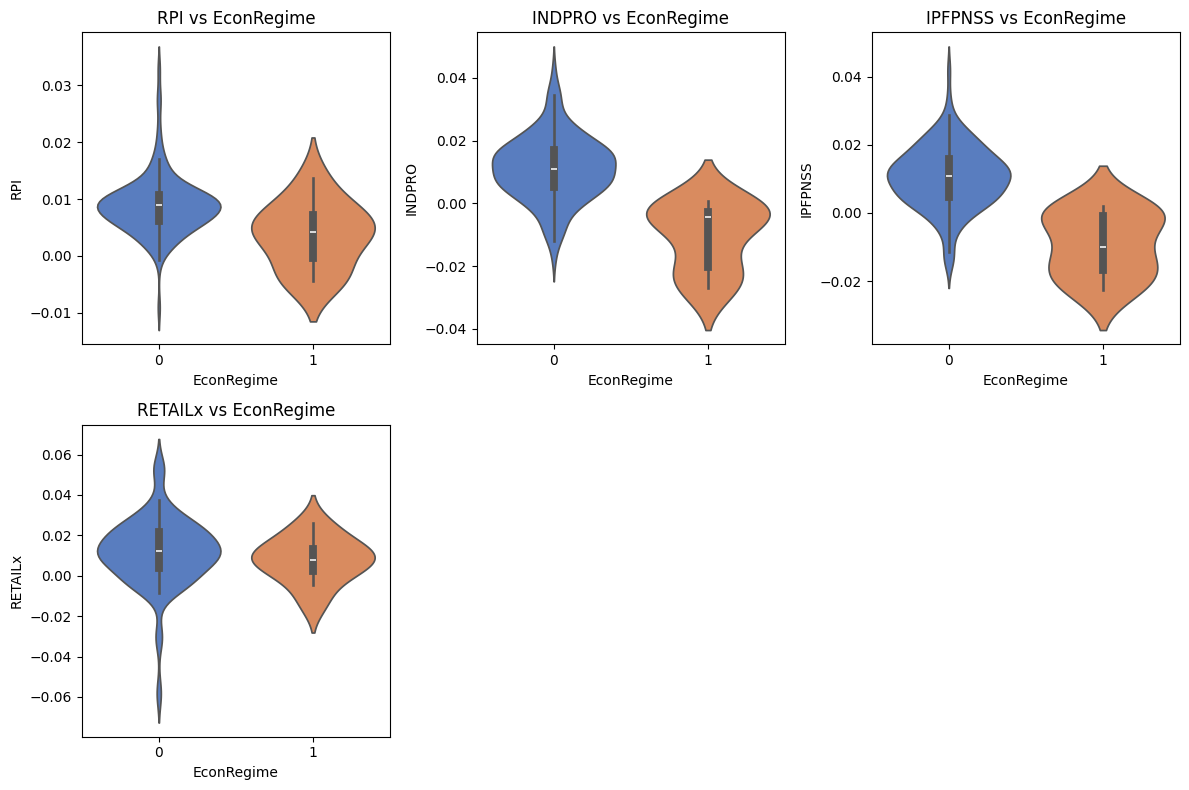

In [97]:
# Specifying split date and target column and horizon
split_date = '1973-01-01'
target_col = 'EconRegime'
h = 1  # horizon

# Load economic regimes dataset
econ_regs_ds = pd.read_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/econ_regs_ds.csv')


# Split the dataset into train/test and out-of-sample validation sets
df_tt = econ_regs_ds[econ_regs_ds['Date']<split_date]


import matplotlib.pyplot as plt
import seaborn as sns

# Violin plot for continuous features against target
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['RPI', 'INDPRO', 'IPFPNSS', 'RETAILx']):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='EconRegime', y=feature, data=df_tt, palette='muted')
    plt.title(f'{feature} vs EconRegime')
plt.tight_layout()
plt.show()


**The below plot provides an interactive visualization of how the Real Personal Income (RPI) changes over time, with zooming and hover capabilities for a better understanding of the data.**

In [98]:
import plotly.express as px

# Time Series plot of Real Personal Income (RPI)
fig = px.line(final_features_df, x='Date', y='RPI', title='Time Series of Real Personal Income (RPI)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='RPI')
fig.show()

In [99]:
# Selecting columns to plot
cols_to_plot = ['Date', 'RPI', 'RETAILx', 'INDPRO']
df_to_plot = final_features_df[cols_to_plot]

# Plot multiple time series
fig = px.line(df_to_plot, x='Date', y=cols_to_plot[1:], title='Multiple Time Series')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Value')
fig.show()

**Above plot visualizes the trends of multiple economic indicators (RPI, RETAILx, INDPRO) over time, allowing for comparison of these time series on a shared x-axis (Date).**

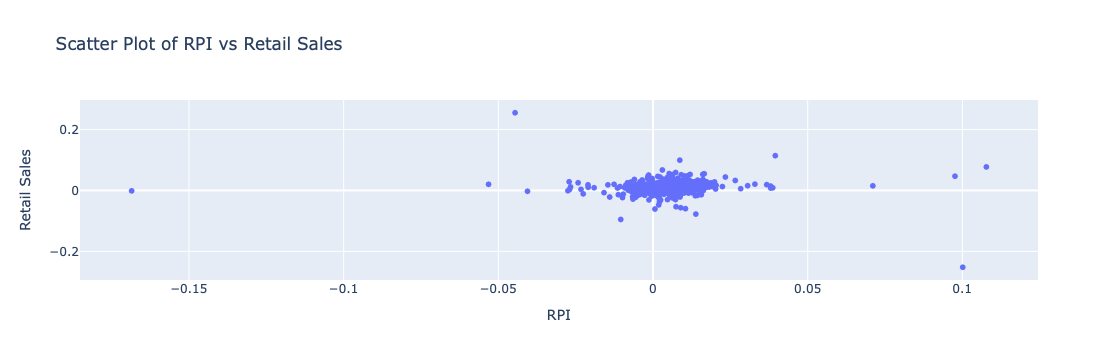

In [100]:
fig = px.scatter(final_features_df, x='RPI', y='RETAILx', title='Scatter Plot of RPI vs Retail Sales')
fig.update_xaxes(title='RPI')
fig.update_yaxes(title='Retail Sales')
fig.show()

In [101]:
import plotly.graph_objects as go

# Assuming sp500_monthly_df contains the OHLC data (Open, High, Low, Close)
fig = go.Figure(data=[go.Candlestick(x=sp500_monthly_df.index,
                open=sp500_monthly_df['Open'],
                high=sp500_monthly_df['High'],
                low=sp500_monthly_df['Low'],
                close=sp500_monthly_df['Close'])])

fig.update_layout(title='S&P500 Monthly OHLC',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

**This plot visualizes the monthly open-high-low-close price movements for the S&P 500 index, providing a clear picture of price fluctuations and trends over time.**

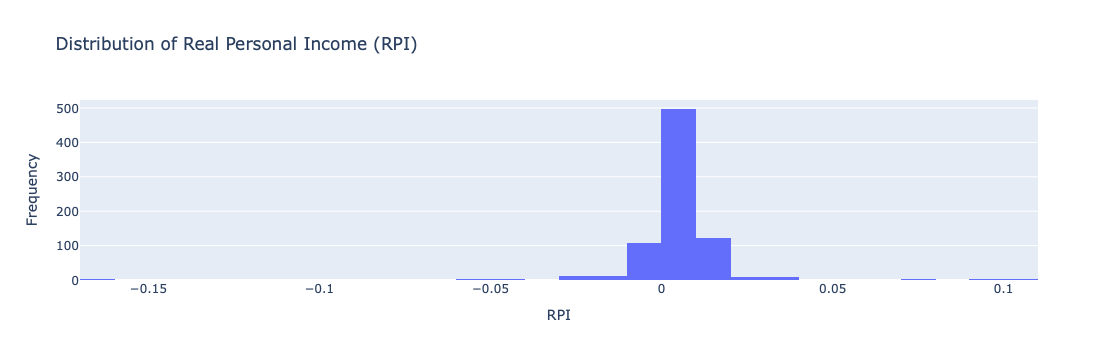

In [102]:
fig = px.histogram(final_features_df, x='RPI', nbins=30, title='Distribution of Real Personal Income (RPI)')
fig.update_xaxes(title='RPI')
fig.update_yaxes(title='Frequency')
fig.show()

**Above plot shows how Real Personal Income (RPI) is distributed across the dataset, helping to understand its spread and central tendency. The histogram visually represents the frequency of different RPI values, with the x-axis showing RPI values and the y-axis showing the number of occurrences for each value range.**

**Below block of code generates a pair plot using Seaborn to visualize the relationships and distributions of selected economic features from the final_features_df DataFrame. The features chosen for this analysis include RPI, RETAILx, INDPRO, IPFPNSS, and IPFINAL. The pair plot displays scatter plots for each pair of features, which help in identifying potential correlations between them, along with histograms or kernel density estimates on the diagonal to illustrate the individual distributions of each feature.**

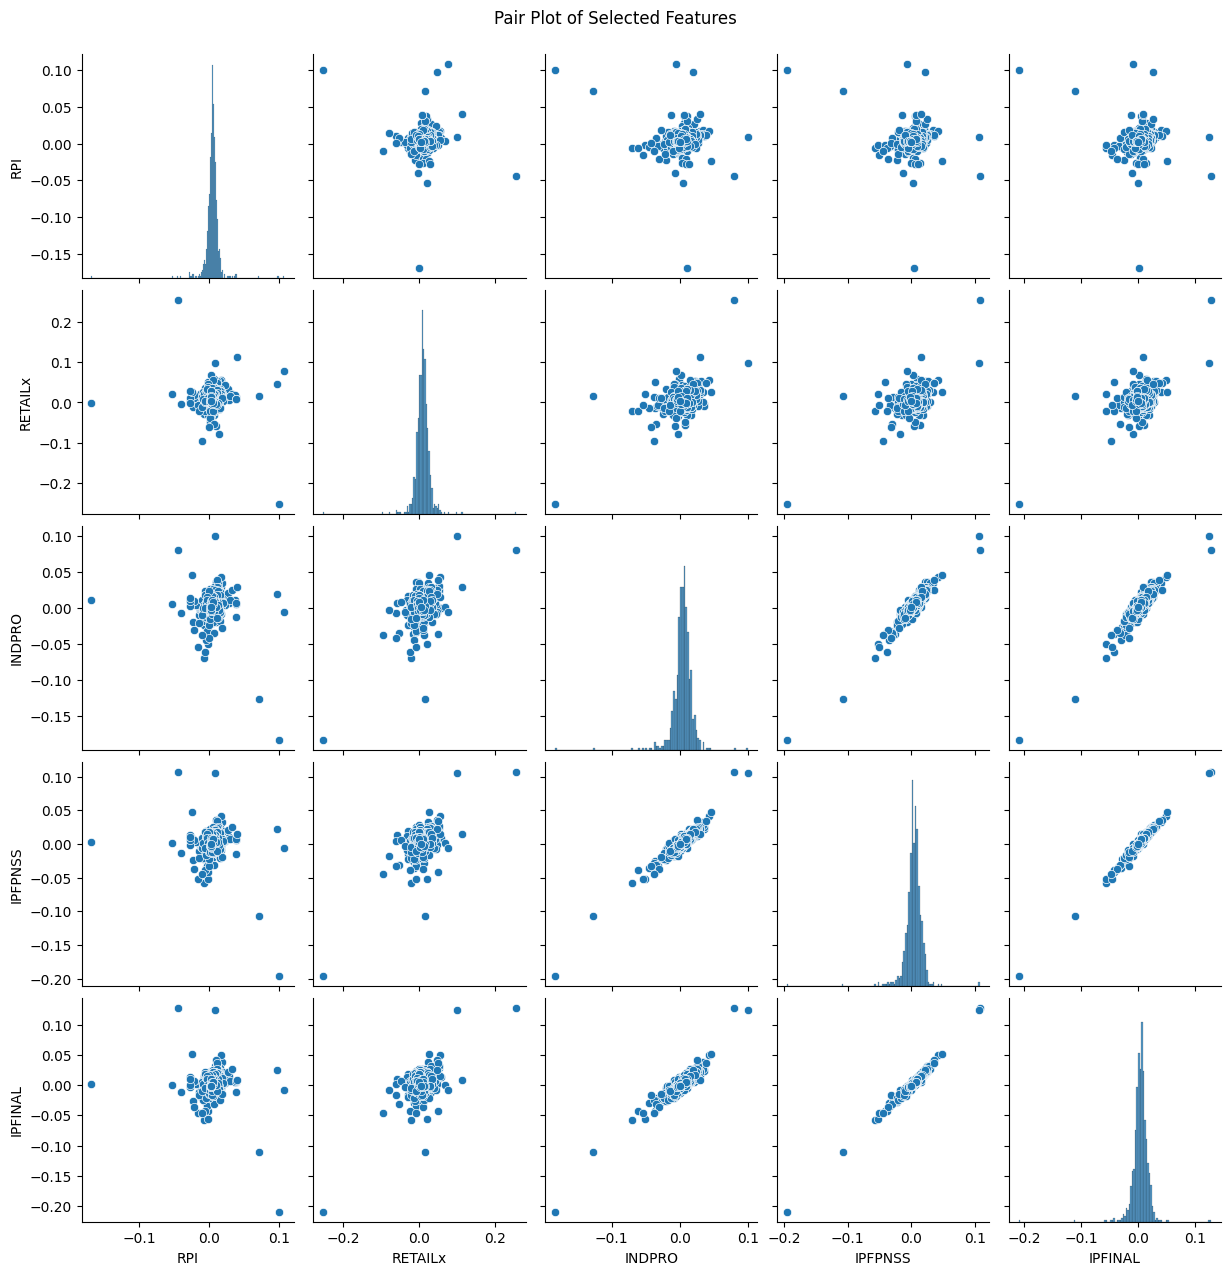

In [103]:
import seaborn as sns

# Select a subset of columns to visualize relationships
subset_cols = ['RPI', 'RETAILx', 'INDPRO', 'IPFPNSS', 'IPFINAL']
sns.pairplot(final_features_df[subset_cols])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [122]:
import sys
sys.path.append('../src')

# General
import pandas as pd
import numpy as np
import itertools

# Visualization
import plotly.express as px
from data_understanding import plot_regimes

# Machine Learning
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation
from feature_importance import plot_confusion_matrix, evaluation_metrics, plot_feature_importance

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

In [124]:
# Specifying split date and target column and horizon
split_date = '1973-01-01'
target_col = 'EconRegime'
h = 1  # horizon

# Load economic regimes dataset
econ_regs_ds = pd.read_csv('/Users/satyakapardibudi/Desktop/Data Science Proj/FRED_MD/econ_regs_ds.csv')

# Extract features columns
feature_cols = econ_regs_ds.columns.drop([target_col, 'Date'])

# Shift feature forward to align with labels in horizon month
econ_regs_ds[feature_cols] = econ_regs_ds[feature_cols].shift(+h)
econ_regs_ds.dropna(inplace=True)

# Split the dataset into train/test and out-of-sample validation sets
df_tt = econ_regs_ds[econ_regs_ds['Date']<split_date]
df_oos = econ_regs_ds[econ_regs_ds['Date']>=split_date]

In [125]:
feature_cols

Index(['Unnamed: 0', 'RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx',
       'RETAILx', 'INDPRO', 'IPFPNSS', 'IPFINAL', 'IPCONGD',
       ...
       'DTCTHFNM 1M Lag', 'DTCTHFNM 3M Lag', 'DTCTHFNM 6M Lag',
       'DTCTHFNM 9M Lag', 'DTCTHFNM 12M Lag', 'INVEST 1M Lag', 'INVEST 3M Lag',
       'INVEST 6M Lag', 'INVEST 9M Lag', 'INVEST 12M Lag'],
      dtype='object', length=715)

In [126]:
# Remove 'Unnamed: 0' from the DataFrame and feature columns list
econ_regs_ds.drop(columns=['Unnamed: 0'], inplace=True)

# Update the feature columns list to exclude 'Unnamed: 0'
feature_cols = econ_regs_ds.columns.drop([target_col, 'Date'])

# Show the updated feature columns
print(feature_cols)


Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'DTCTHFNM 1M Lag', 'DTCTHFNM 3M Lag', 'DTCTHFNM 6M Lag',
       'DTCTHFNM 9M Lag', 'DTCTHFNM 12M Lag', 'INVEST 1M Lag', 'INVEST 3M Lag',
       'INVEST 6M Lag', 'INVEST 9M Lag', 'INVEST 12M Lag'],
      dtype='object', length=714)


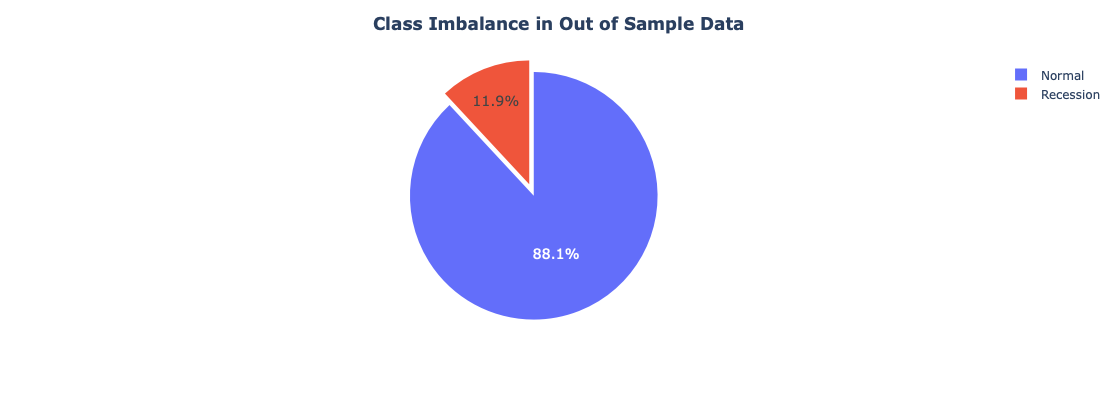

In [144]:
# Count the number of regimes in target variable
target_counts = df_oos[target_col].value_counts()
target_counts.index = ['Normal', 'Recession']

# Create the pie chart
fig = px.pie(
    values=target_counts,
    names=target_counts.index)

# Pull slices slightly for emphasis, set the font size
fig.update_traces(textinfo='percent', pull=[0.05, 0.05], textfont_size=14) 

# Set the layout parameters
fig.update_layout(title_text= '<b> Class Imbalance in Out of Sample Data </b>', title_x=0.5,
                  autosize=False, width=400, height=400,
                  showlegend=True)

fig.show()

In [183]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import itertools

# Define the feature columns and target column
feature_cols = df_tt.columns.drop(['EconRegime', 'Date'])  # Drop target and Date columns
target_col = 'EconRegime'  # Target column name

# Step 1: Split the dataset into features and target
X_train = df_tt[feature_cols]  # Features for training
y_train = df_tt[target_col]    # Target for training
X_test = df_oos[feature_cols]  # Features for out-of-sample predictions
y_test = df_oos[target_col]   # Actual target for out-of-sample

# Define a function to train and evaluate models
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train the model on the training set

    # Make predictions on the out-of-sample data
    y_pred = model.predict(X_test)

    # Check if predict_proba() has more than 1 class (binary classification case)
    if model.classes_.shape[0] == 2:
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    else:
        y_prob = np.zeros_like(y_pred)  # If only one class is predicted, set probability to 0

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate classification report (precision, recall, F1-score)
    class_report = classification_report(y_test, y_pred)

    # Print the results
    print(f"{model_name} Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    
    return y_prob  # Return the predicted probabilities

# Step 2: Train and evaluate each model

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_prob = train_and_evaluate_model(dt_model, 'Decision Tree', X_train, y_train, X_test, y_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=200)
rf_prob = train_and_evaluate_model(rf_model, 'Random Forest', X_train, y_train, X_test, y_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, max_depth=5, n_estimators=200, learning_rate=0.1)
xgb_prob = train_and_evaluate_model(xgb_model, 'XGBoost', X_train, y_train, X_test, y_test)

# Step 3: Combine Predictions for the Entire df_oos (if necessary)
# If you want to use the entire df_oos and not just X_test for prediction:
y_prob_dt = dt_model.predict_proba(df_oos[feature_cols])[:, 1]  # Decision Tree probabilities
y_prob_rf = rf_model.predict_proba(df_oos[feature_cols])[:, 1]  # Random Forest probabilities
y_prob_xgb = xgb_model.predict_proba(df_oos[feature_cols])[:, 1]  # XGBoost probabilities

# Combine all the predictions into one DataFrame
res_rolling_all = pd.DataFrame({
    'Date': df_oos['Date'],  # Add the 'Date' from df_oos for timeline
    'Regime': df_oos[target_col],  # Actual labels from df_oos
    'DT_Prob': y_prob_dt,  # Decision Tree predicted probabilities
    'RF_Prob': y_prob_rf,  # Random Forest predicted probabilities
    'XGB_Prob': y_prob_xgb  # XGBoost predicted probabilities
})

# Display the combined DataFrame
print(res_rolling_all.head())


Decision Tree Model Evaluation Metrics:
Accuracy: 0.8857
Confusion Matrix:
[[518  29]
 [ 42  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       547
           1       0.52      0.43      0.47        74

    accuracy                           0.89       621
   macro avg       0.72      0.69      0.70       621
weighted avg       0.88      0.89      0.88       621

Random Forest Model Evaluation Metrics:
Accuracy: 0.9098
Confusion Matrix:
[[536  11]
 [ 45  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       547
           1       0.72      0.39      0.51        74

    accuracy                           0.91       621
   macro avg       0.82      0.69      0.73       621
weighted avg       0.90      0.91      0.90       621

XGBoost Model Evaluation Metrics:
Accuracy: 0.9130
Confusion Matrix:
[[534  13]
 [ 41  33]]
Classificati

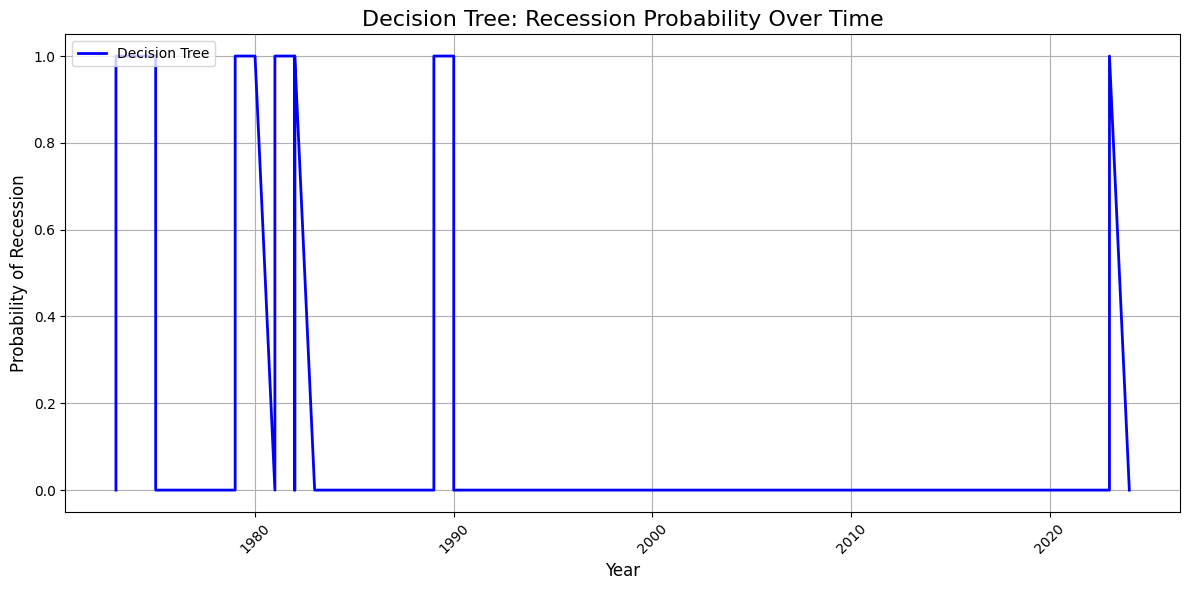

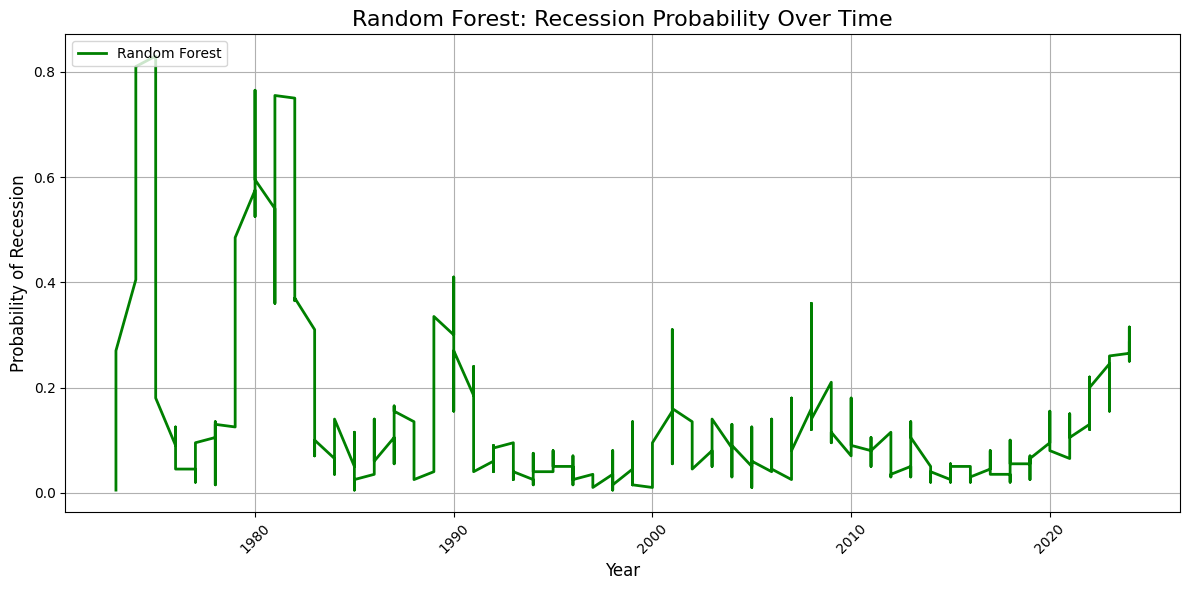

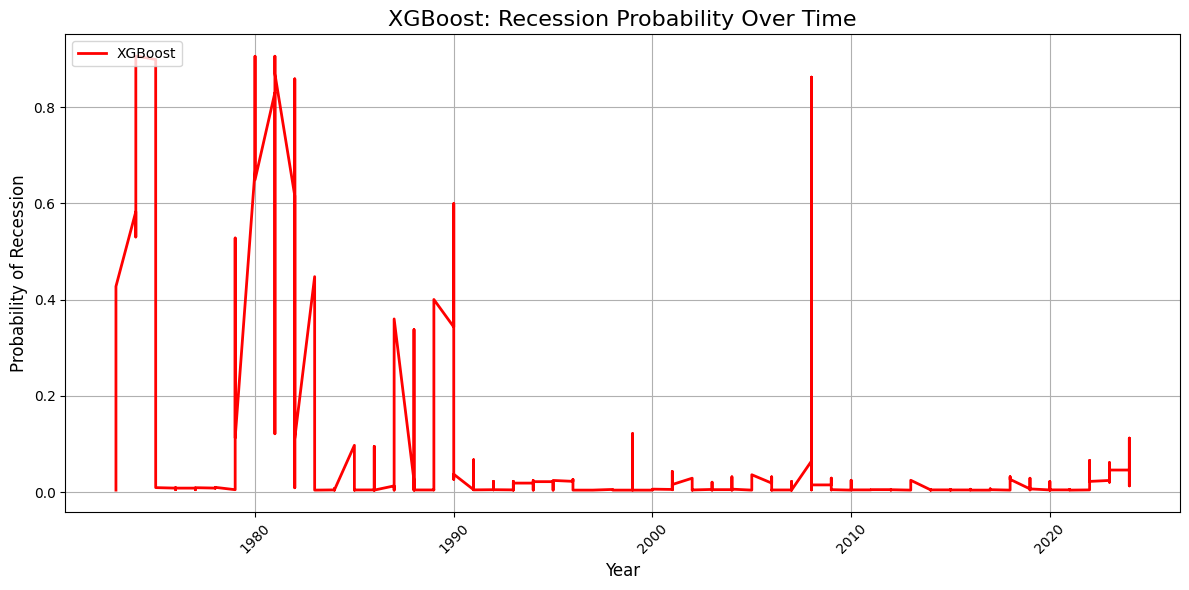

In [187]:
import matplotlib.pyplot as plt

# Ensure that 'Date' column is in datetime format
df_oos['Date'] = pd.to_datetime(df_oos['Date'], errors='coerce')  # Coerce errors to NaT if invalid

# Now, extract the year
df_oos['Year'] = df_oos['Date'].dt.year

# Set up the figure size for better visualization
plt.figure(figsize=(12, 6))

# Plot for Decision Tree
plt.plot(df_oos['Year'], res_rolling_all['DT_Prob'], label='Decision Tree', color='b', linewidth=2)
plt.title('Decision Tree: Recession Probability Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Recession', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()  # Display the plot for Decision Tree

# Plot for Random Forest
plt.figure(figsize=(12, 6))  # Create a new figure for Random Forest
plt.plot(df_oos['Year'], res_rolling_all['RF_Prob'], label='Random Forest', color='g', linewidth=2)
plt.title('Random Forest: Recession Probability Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Recession', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()  # Display the plot for Random Forest

# Plot for XGBoost
plt.figure(figsize=(12, 6))  # Create a new figure for XGBoost
plt.plot(df_oos['Year'], res_rolling_all['XGB_Prob'], label='XGBoost', color='r', linewidth=2)
plt.title('XGBoost: Recession Probability Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Probability of Recession', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()  # Display the plot for XGBoost


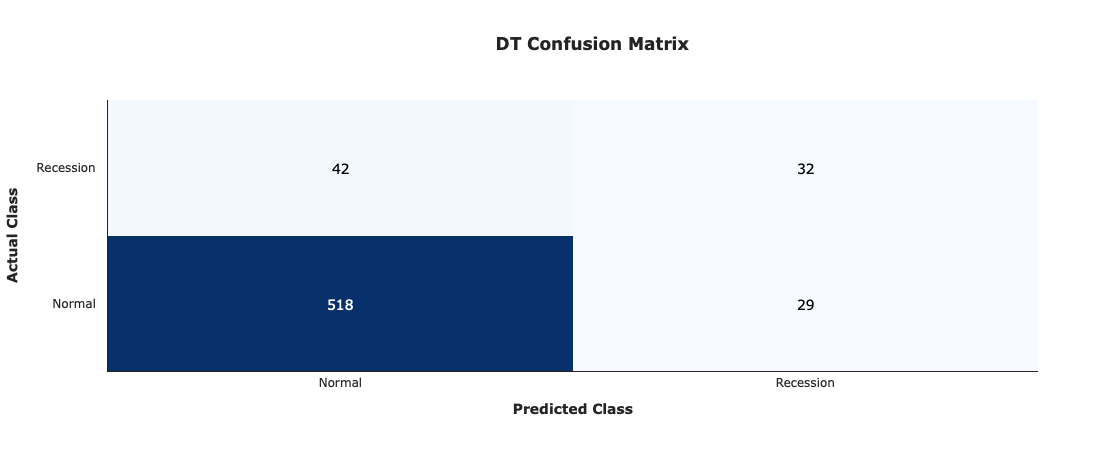

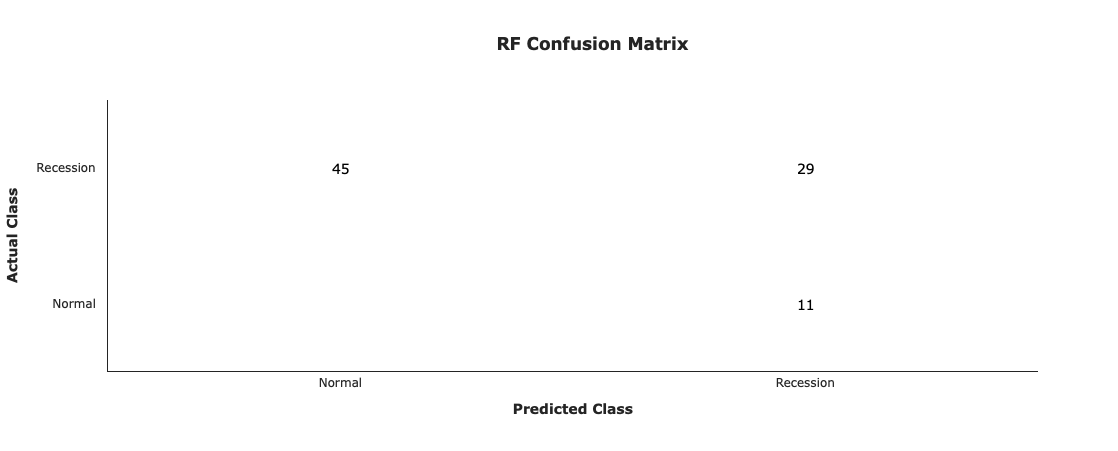

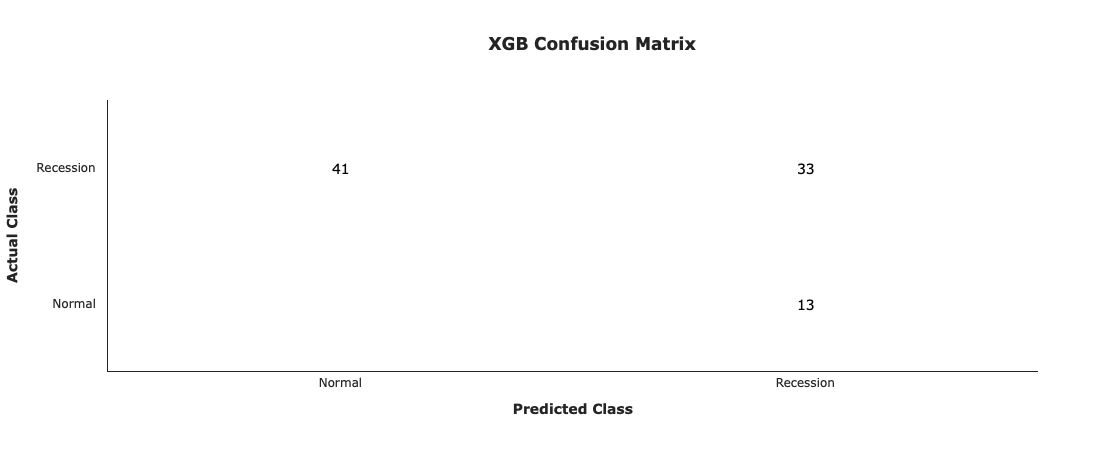

In [191]:

# Assuming these variables hold the predictions for each model
y_pred_dt = dt_model.predict(X_test)  # Replace with actual predictions
y_pred_rf = rf_model.predict(X_test)  # Replace with actual predictions
y_pred_xgb = xgb_model.predict(X_test)  # Replace with actual predictions

# Define the models and corresponding predicted variables
models = ['DT', 'RF', 'XGB']

# Loop through each model and plot its confusion matrix
for model in models:
    # Get the correct prediction variable based on the model name
    y_pred = locals()[f'y_pred_{model.lower()}']
    
    # Plot confusion matrix for each model
    cm_fig = plot_confusion_matrix(
        y_true = y_test, 
        y_pred = y_pred, 
        class_names = ['Normal', 'Recession'],
        title = f'{model} Confusion Matrix',
        width = 450,
        height = 450
    )
    
    # Show the confusion matrix plot for the current model
    cm_fig.show()

In [192]:
# Get feature importances from the Decision Tree model
dt_feature_importances = dt_model.feature_importances_

# Create a DataFrame to view the feature importance for Decision Tree
dt_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_feature_importances
})

# Sort the features by importance in descending order for Decision Tree
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features for Decision Tree
print("Top Features Contributing Most to the Decision Tree:")
print(dt_importance_df.head())  # Print top features (adjust the number based on need)

# Get feature importances from the Random Forest model
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importance for Random Forest
rf_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_feature_importances
})

# Sort the features by importance in descending order for Random Forest
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features for Random Forest
print("Top Features Contributing Most to the Random Forest:")
print(rf_importance_df.head())  # Print top features (adjust the number based on need)

# Get feature importances from the XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame to view the feature importance for XGBoost
xgb_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_feature_importances
})

# Sort the features by importance in descending order for XGBoost
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features for XGBoost
print("Top Features Contributing Most to the XGBoost:")
print(xgb_importance_df.head())  # Print top features (adjust the number based on need)


Top Features Contributing Most to the Decision Tree:
                  Feature  Importance
552        T10YFFM 6M Lag    0.833136
668          PCEPI 9M Lag    0.166864
479  S&P PE ratio 12M Lag    0.000000
471  S&P div yield 3M Lag    0.000000
472  S&P div yield 6M Lag    0.000000
Top Features Contributing Most to the Random Forest:
            Feature  Importance
552  T10YFFM 6M Lag    0.056849
548   T5YFFM 9M Lag    0.041616
557   AAAFFM 6M Lag    0.037427
547   T5YFFM 6M Lag    0.034218
558   AAAFFM 9M Lag    0.032187
Top Features Contributing Most to the XGBoost:
             Feature  Importance
532  TB3SMFFM 6M Lag    0.325219
543    T1YFFM 9M Lag    0.229793
428    M2REAL 9M Lag    0.157996
548    T5YFFM 9M Lag    0.112274
106      CUSR0000SAS    0.051461
